In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation #type: ignore
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
def Prophet_pipeline(ticker,periods=30):
    Data = yf.download(ticker)
    Data.reset_index(inplace=True)
    Data['Date'] = pd.to_datetime(Data['Date'])
    Data['Date'] = Data['Date'].dt.tz_localize(None)
    Data = Data[Data['Date'] > '2015-01-01']
    Data = Data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    model = Prophet()
    model.fit(Data)
    df_cv = cross_validation(model, initial='1900 days', period='30 days', horizon = '30 days')
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast[-periods:]

def Arima_pipeline(ticker,periods=30,order=(1,2,1),seasonal_order = (1,2,1,12)):
    Data = yf.download(ticker)
    Data.reset_index(inplace=True)
    Data['Date'] = pd.to_datetime(Data['Date'])
    Data['Date'] = Data['Date'].dt.tz_localize(None)
    Data = Data[Data['Date'] > '2015-01-01']
    Data = Data[['Date', 'Close']]
    Data.set_index('Date', inplace=True)

    model = SARIMAX(Data, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=periods)
    return forecast

In [4]:
ARIMA_predictions = Arima_pipeline('AAPL')

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supporte

In [5]:
Prophet_predictions = Prophet_pipeline('AAPL')["yhat"]

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/j6dohos7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/vvfprmyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79400', 'data', 'file=/tmp/tmpk0cwzqy_/j6dohos7.json', 'init=/tmp/tmpk0cwzqy_/vvfprmyf.json', 'output', 'file=/tmp/tmpk0cwzqy_/prophet_model66ffwc0o/prophet_model-20240502114303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 50 forecasts with cutoffs between 2020-03-23 00:00:00

  0%|          | 0/50 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/h337sgpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/8eucyy9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91470', 'data', 'file=/tmp/tmpk0cwzqy_/h337sgpo.json', 'init=/tmp/tmpk0cwzqy_/8eucyy9o.json', 'output', 'file=/tmp/tmpk0cwzqy_/prophet_model9j4wiy2l/prophet_model-20240502114305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/9rw6c5jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0cwzqy_/fc7wi9xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [6]:
import matplotlib.pyplot as plt

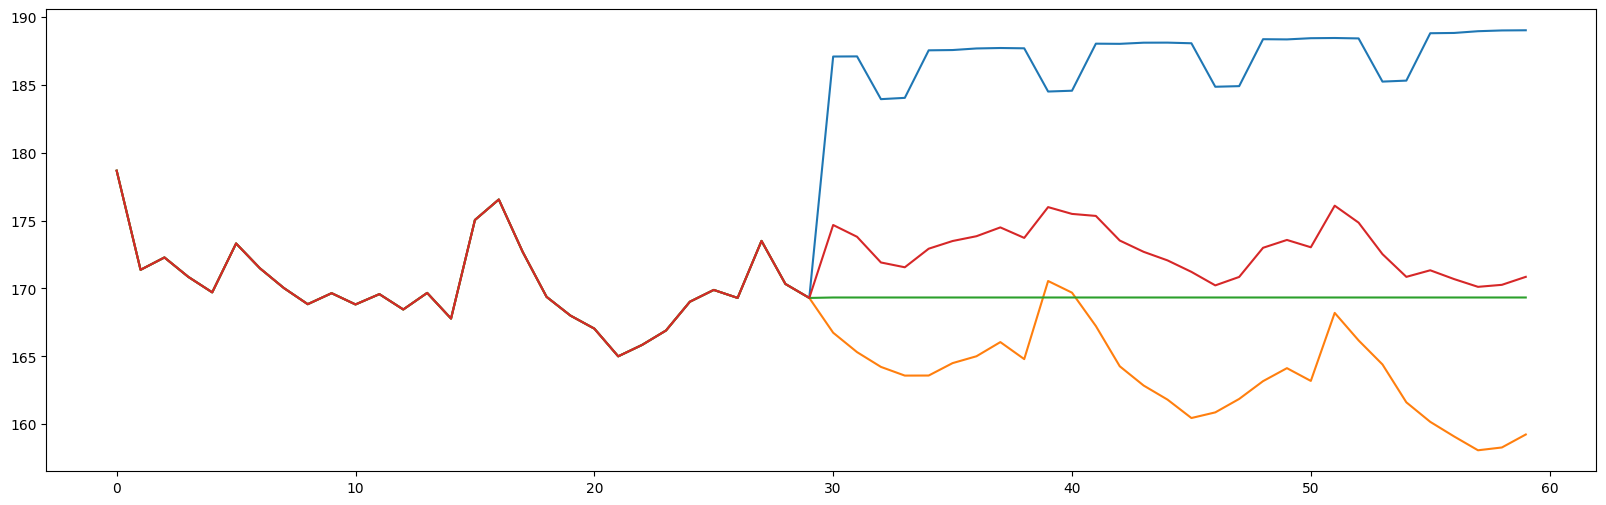

In [8]:
plt.figure(figsize=(20,6))
plt.plot(np.concatenate([Data.iloc[-30:]['Close'].values, Prophet_predictions]))
plt.plot(np.concatenate([Data.iloc[-30:]['Close'].values, ARIMA_predictions]))
plt.plot(np.concatenate([Data.iloc[-30:]['Close'].values, 0.39*Prophet_predictions+0.61*ARIMA_predictions]))